In [8]:
try:
    import tools.invariants.functions as f
    from tools.invariants.kernel import Kernel
    from testing import *
except:
    import fastlane_bot.tools.invariants.functions as f
    from fastlane_bot.tools.invariants.kernel import Kernel
    from fastlane_bot.testing import *

import numpy as np
import math as m
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12,6]

print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(f.Function))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(Kernel))

Function v0.9.3 (21/Jan/2024)
Kernel v0.9 (18/Jan/2024)


# AMM Functions  (Invariants Module; NBTest068)

## Plots [NOTEST]

In [9]:
rg = rg0 = (1,20)
xlim = (0,20)
ylim = (0,10)
p = lambda fn: str(f.fmt(fn.params(classname=True), ".2f"))

### Constant-product-style AMMs

#### Plain constant product (Bancor V2.1, Bancor V3; Uniswap V2)

$$
y(x) = \frac k x
$$

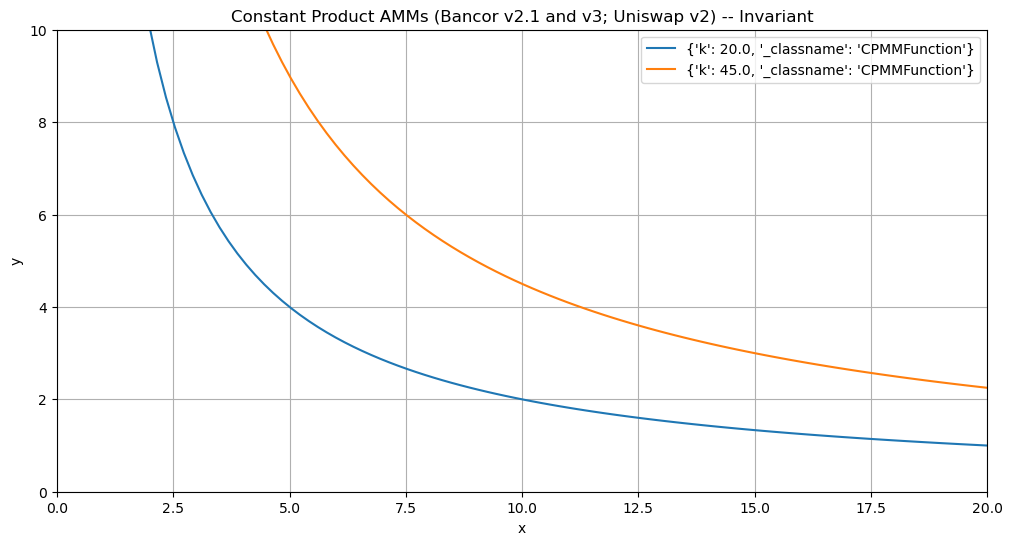

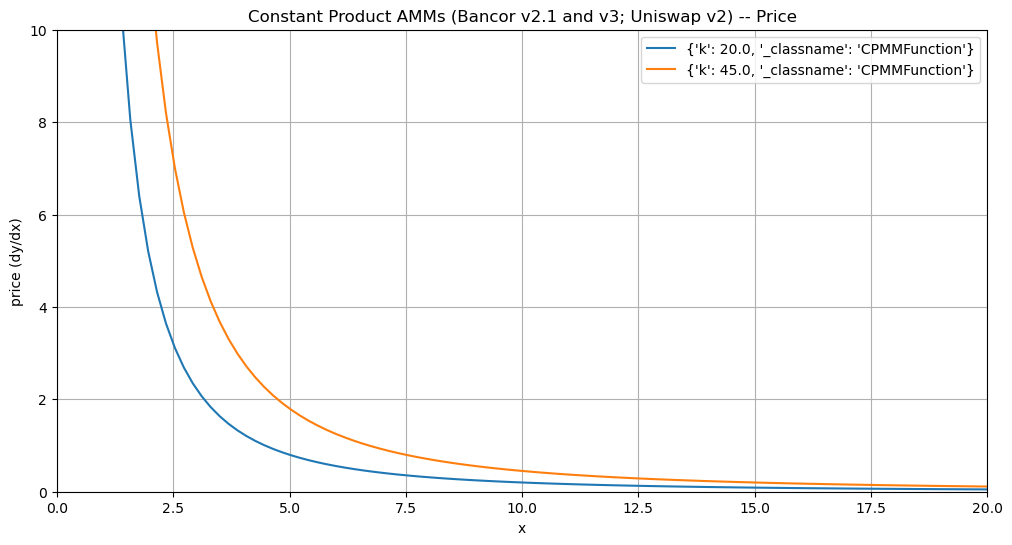

In [10]:
assert f.CPMM is f.CPMMFunction
assert f.BancorV21 is f.CPMMFunction
assert f.BancorV3 is f.CPMMFunction
assert f.UniV2 is f.CPMMFunction
fn1 = f.CPMM(k=20)
fn2 = fn1.update(k=fn1.k*1.5**2)
for fn in [fn1, fn2]:
    fn.plot(*rg, label=f"{p(fn)}")
plt.title("Constant Product AMMs (Bancor v2.1 and v3; Uniswap v2) -- Invariant")
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}")
plt.title("Constant Product AMMs (Bancor v2.1 and v3; Uniswap v2) -- Price")
plt.ylabel("price (dy/dx)")
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

#### Levered constant product (virtual token balances)

$$
y(x) + y_0 = \frac k {x+x_0}
$$

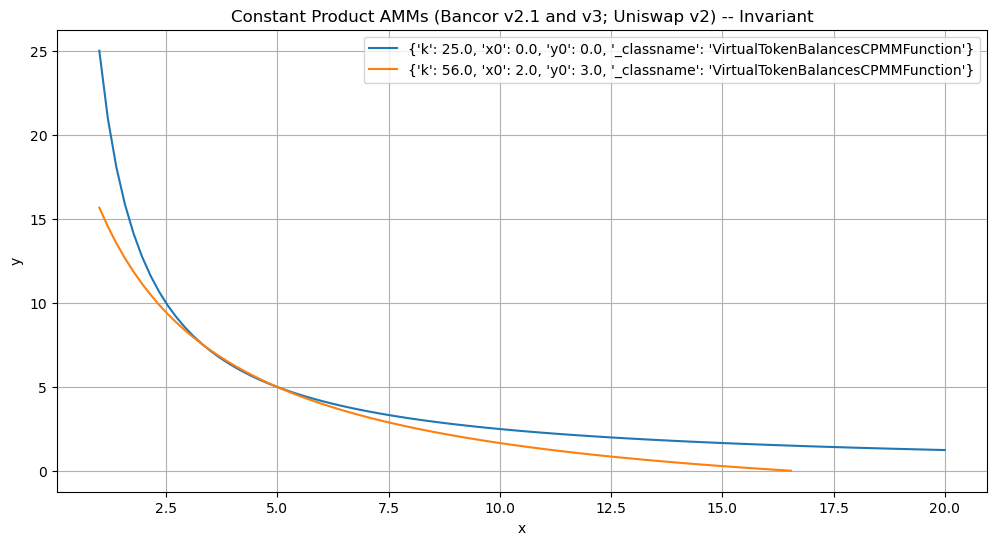

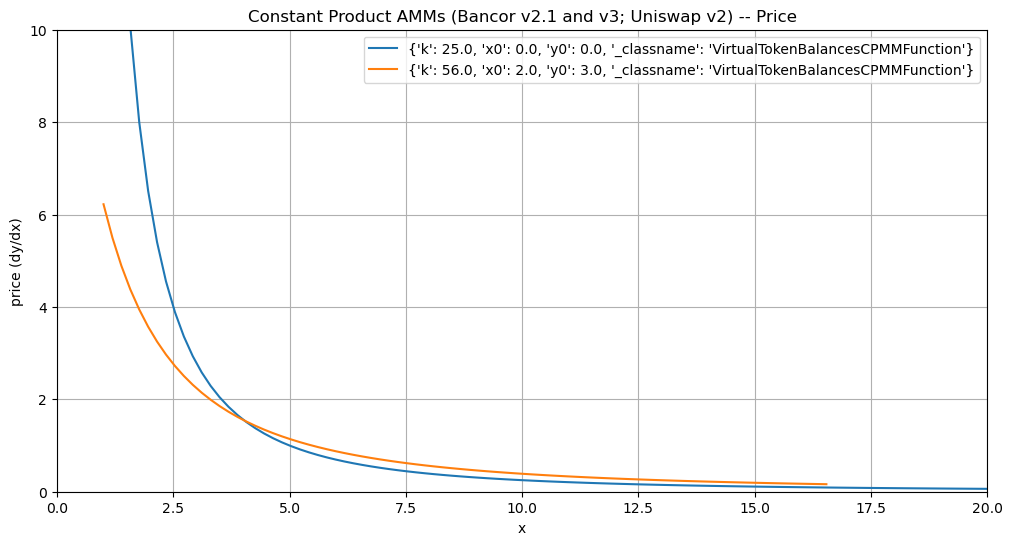

In [11]:
assert f.LCPMM is f.VirtualTokenBalancesCPMMFunction
assert f.VTBCPMM is f.VTBCPMM
fn1 = f.LCPMM(k=5*5)
fn2 = fn1.update(k=7*8, x0=2, y0=3)
for fn in [fn1, fn2]:
    fn.plot(*rg, label=f"{p(fn)}")
plt.title("Constant Product AMMs (Bancor v2.1 and v3; Uniswap v2) -- Invariant")
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}")
plt.title("Constant Product AMMs (Bancor v2.1 and v3; Uniswap v2) -- Price")
plt.ylabel("price (dy/dx)")
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

#### Levered constant product (Uniswap V3)

[UniV3Function] x0, y0: 2.5 7.0710678118654755
[UniV3Function] x0, y0: 2.5 7.0710678118654755


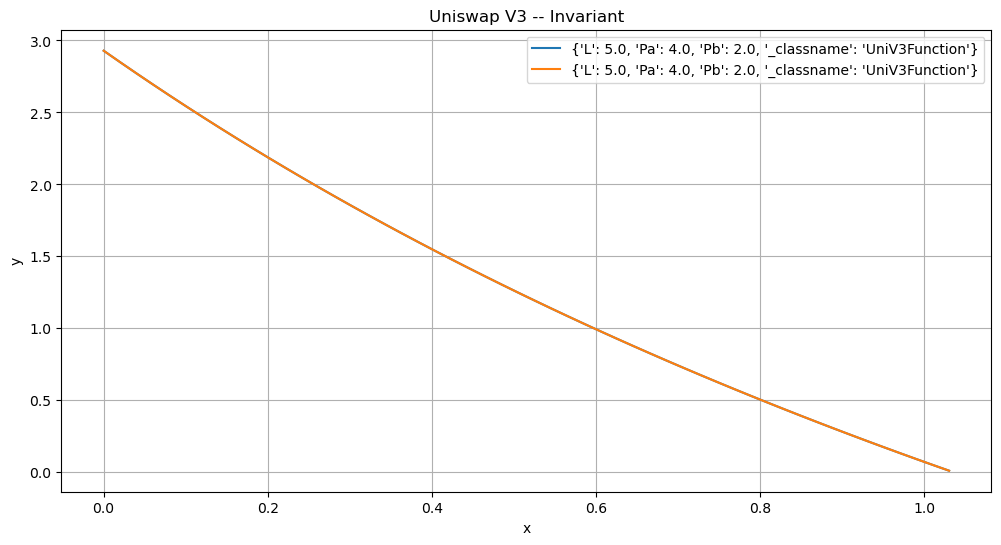

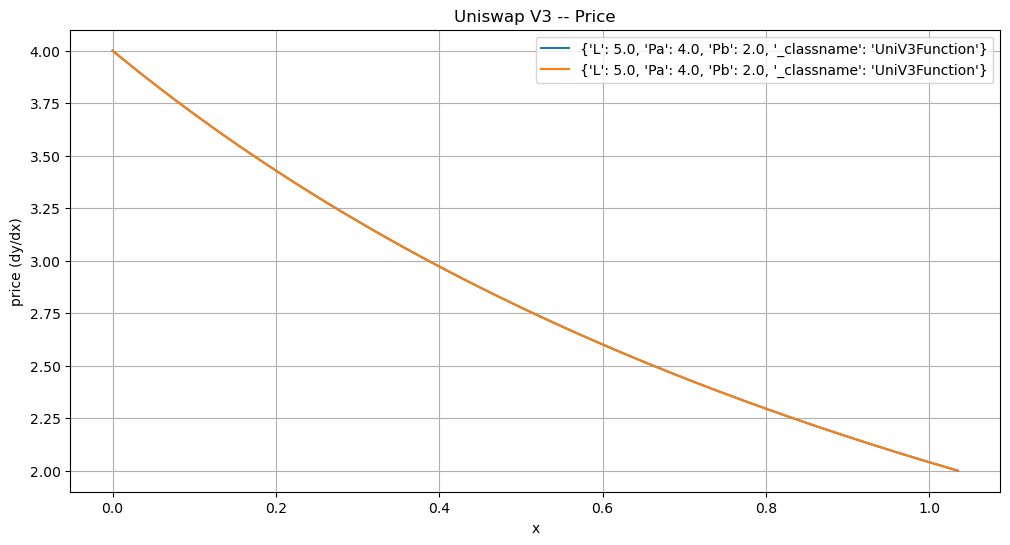

In [12]:
rg = (0,2)
assert f.UniV3 is f.UniV3Function
fn1 = f.UniV3(Pa=4, Pb=2, L=5)
fn2 = fn1.update(L=5)
for fn in [fn1, fn2]:
    fn.plot(*rg, label=f"{p(fn)}")
plt.title("Uniswap V3 -- Invariant")
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}", steps=1000)
plt.title("Uniswap V3 -- Price")
plt.ylabel("price (dy/dx)")
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()

#### Levered constant product (Carbon)

[CarbonFunction] x0, y0: 4.26776695296637 12.071067811865479
[CarbonFunction] x0, y0: 4.26776695296637 12.071067811865479


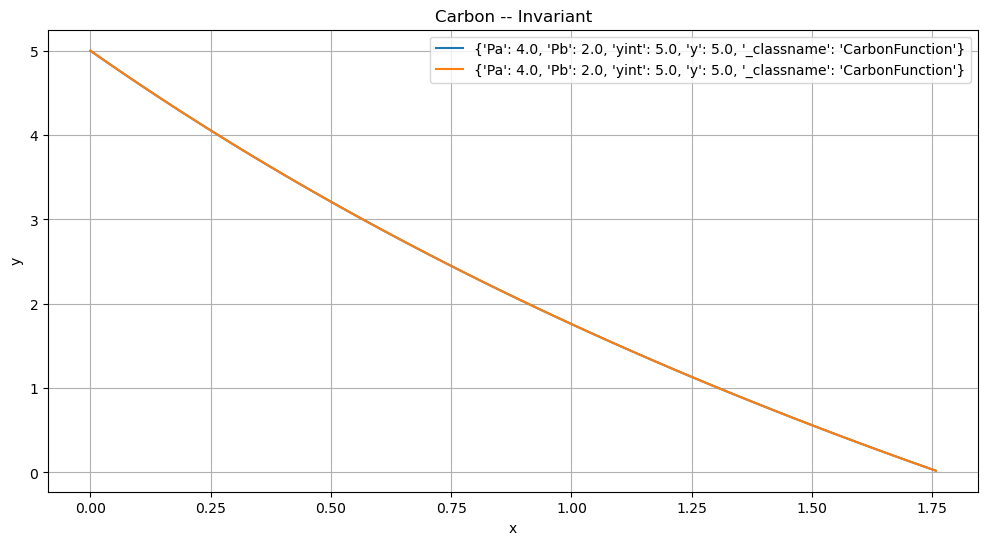

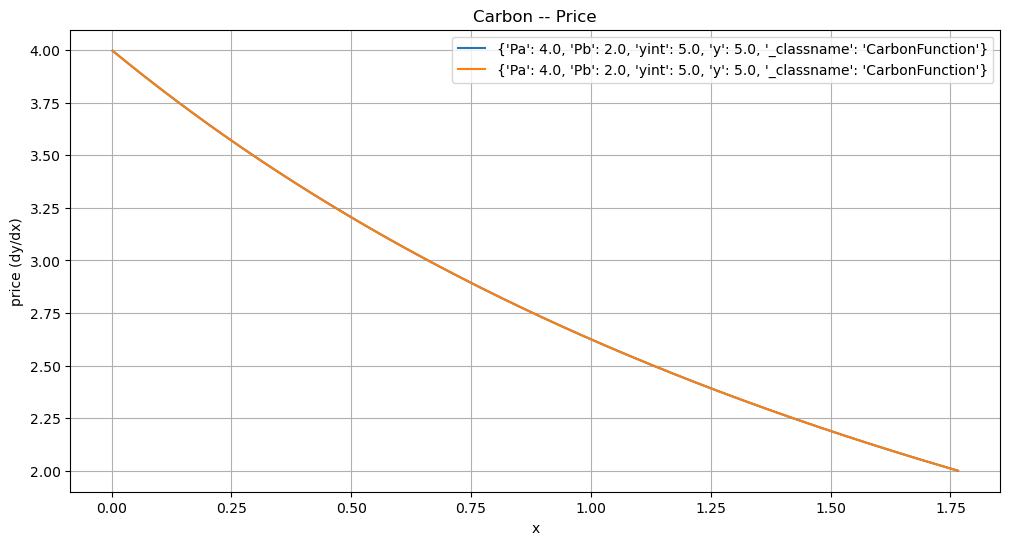

In [13]:
rg = (0,2)
assert f.Carbon is f.CarbonFunction
fn1 = f.Carbon(Pa=4, Pb=2, yint=5)
fn2 = fn1.update()
for fn in [fn1, fn2]:
    fn.plot(*rg, label=f"{p(fn)}")
plt.title("Carbon -- Invariant")
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}", steps=1000)
plt.title("Carbon -- Price")
plt.ylabel("price (dy/dx)")
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()

### Other AMMs

#### Solidly

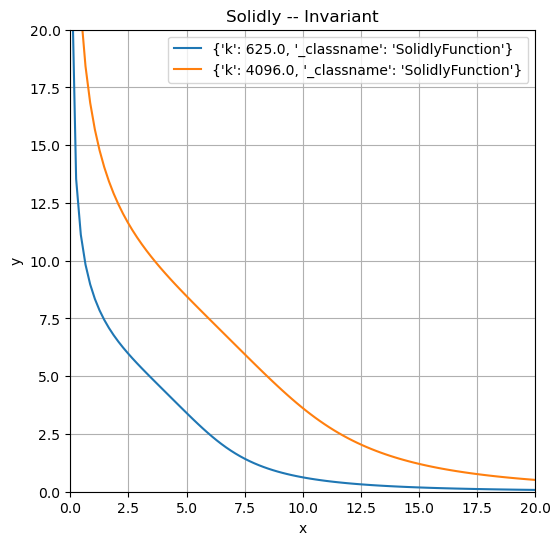

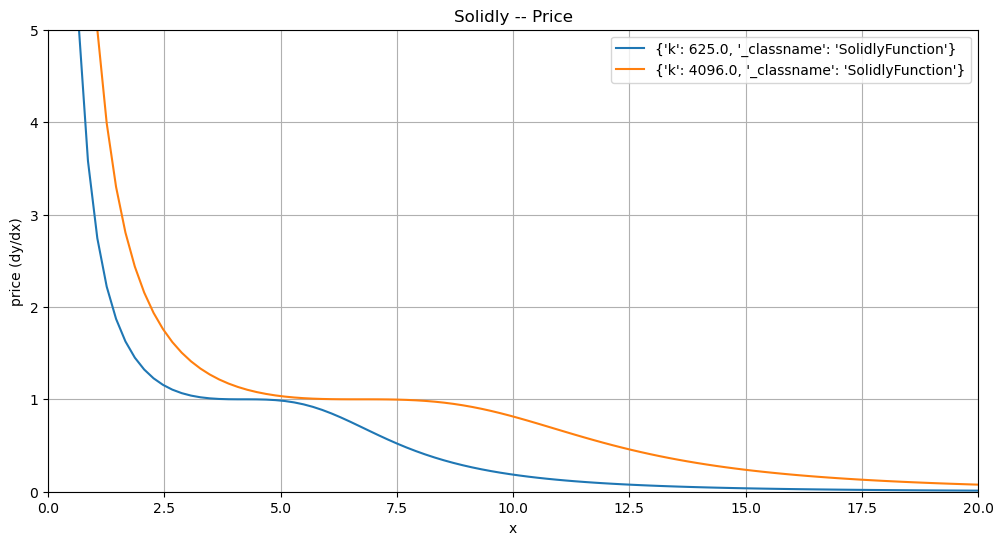

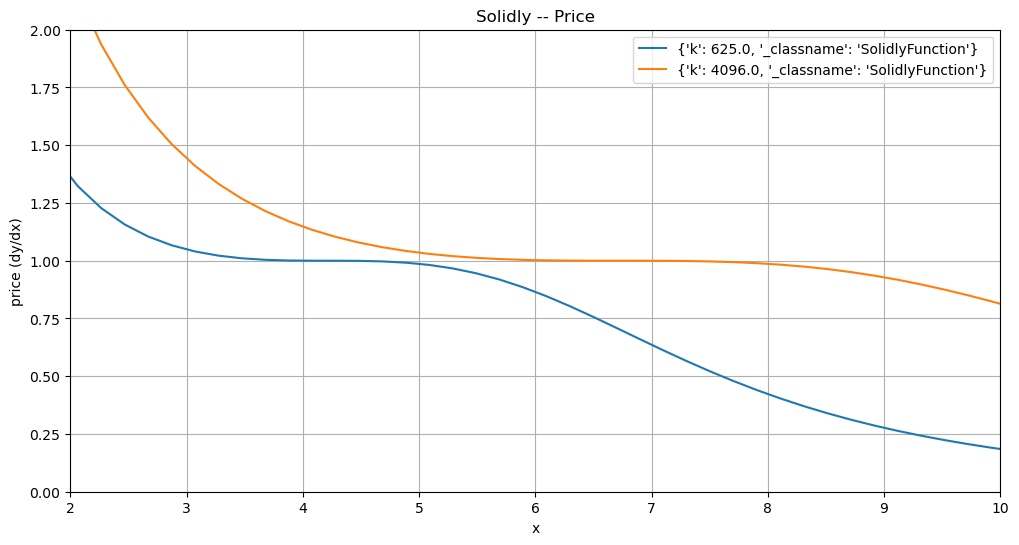

In [20]:
rg = (0.05,20)
plt.figure(figsize=(6,6))
assert f.Solidly is f.SolidlyFunction
fn1 = f.Solidly(k=5**4)
fn2 = fn1.update(k=8**4)
for fn in [fn1, fn2]:
    fn.plot(*rg, label=f"{p(fn)}")
plt.title("Solidly -- Invariant")
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}", steps=100)
plt.title("Solidly -- Price")
plt.ylabel("price (dy/dx)")
plt.xlim(0,20)
plt.ylim(0,5)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}", steps=100)
plt.title("Solidly -- Price")
plt.ylabel("price (dy/dx)")
plt.xlim(2,10)
plt.ylim(0,2)
plt.show()